In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import calendar
%matplotlib inline
sns.set_style("white", {'axes.grid' : True})
sns.set_palette("tab10", 14)
sns.set_context('talk')

## Original exploration based only on train set which includes ride counts

In [3]:
data=pd.read_csv('train_revised_1.csv')
data.sort_values(['ride_id','travel_date', 'travel_time']).head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
35028,1442,17/10/2017,07:15,Migori,Bus,49
35029,5437,19/11/2017,07:12,Migori,Bus,49
10002,5710,26/11/2017,07:05,Keroka,Bus,49
1788,5777,27/11/2017,07:10,Homa Bay,Bus,49
1789,5777,27/11/2017,07:10,Homa Bay,Bus,49


In [4]:
# Drpop seat number column
# data=data.drop('seat_number', axis=1)
# express travel date as datetime
data.travel_date = pd.to_datetime(data.travel_date, dayfirst=True)
data["travel_time"] = data["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)
# Grouping departure time into travel hour
data['travel_hour'] = data.travel_time.round()
# creating a column which counts the ride_ids
data['rides'] = data['ride_id']
data['rides'] = np.where(data['rides'].notnull(), 1, np.NaN)
data['ride_count'] = data.groupby(['ride_id', 'rides'])['ride_id'].transform('count')
data.drop('rides', axis=1,inplace=True)
# converting travel dates into days of the week
data['day'] = data.travel_date.dt.weekday
data['day'] = data['day'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

In [50]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,ride_count,day,travel_hour,traintest
0,6654,2017-12-05,7.133333,Awendo,Bus,49,2,Tue,7.0,train
1,6654,2017-12-05,7.133333,Awendo,Bus,49,2,Tue,7.0,train
2,8380,2018-01-07,7.250000,Awendo,Bus,49,1,Sun,7.0,train
3,8381,2018-01-07,7.133333,Awendo,Bus,49,7,Sun,7.0,train
4,8381,2018-01-07,7.133333,Awendo,Bus,49,7,Sun,7.0,train


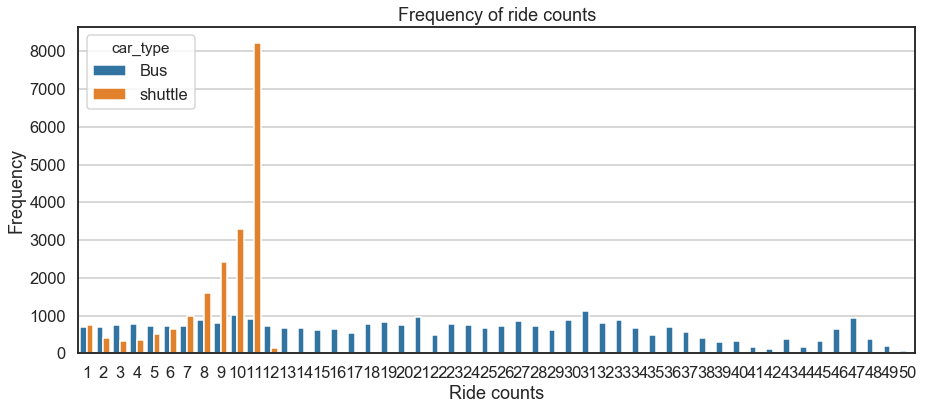

In [56]:
# Frequency of ride counts
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='ride_count', hue='car_type', data=data)
plt.ylabel("Frequency")
plt.xlabel("Ride counts")
plt.title("Frequency of ride counts")
plt.show()

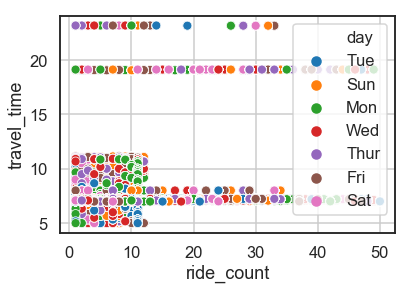

In [70]:
sns.scatterplot(data.ride_count, data.travel_time, hue=data.day, markers='.')

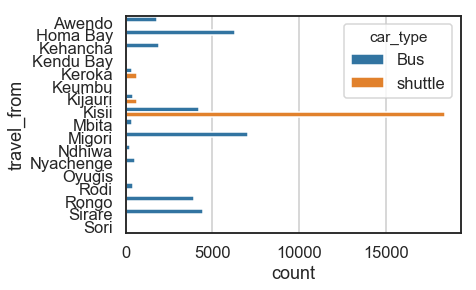

In [77]:
sns.countplot(y='travel_from',hue='car_type', data=data)

## Importing data from later analysis including tain and test data

In [48]:
data_exp = pd.read_csv('data_explore.csv')

In [49]:
# Adding few extra eatures to help with exploration
data_exp['travel_hour'] = data_exp.travel_time.round()
# Enabling exploration by training and test data
data_exp['traintest'] = np.where(data_exp.number_of_ticket.notnull(), 'train', 'test')
# SPecifying travel month
data_exp.travel_date = pd.to_datetime(data_exp.travel_date, dayfirst=True)
data_exp['month'] = data_exp.travel_date.dt.month
data_exp = data_exp.drop('Unnamed: 0', axis=1)
data_exp.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,day,daily_mean,daily_min,daily_max,tf_mean,tf_min,tf_max,time_frame,travel_hour,traintest,month
0,1442,2017-10-17,7.250000,Migori,Bus,49,1.0,Tue,2734.0,1947.0,4061.0,2978.0,2014.0,4864.0,pm,7.0,train,10
1,14304,2017-11-14,5.166667,Kisii,Bus,49,1.0,Tue,2974.0,1806.0,5122.0,3011.0,1859.0,5007.0,mid,5.0,train,11
2,5437,2017-11-19,7.200000,Migori,Bus,49,1.0,Sun,1905.0,1437.0,2598.0,1921.0,1439.0,2651.0,pm,7.0,train,11
3,5710,2017-11-26,7.083333,Keroka,Bus,49,1.0,Sun,2181.0,1474.0,3350.0,2115.0,1458.0,3133.0,pm,7.0,train,11
4,13577,2017-11-27,9.000000,Kisii,shuttle,11,11.0,Mon,3121.0,1634.0,6066.0,3634.0,1840.0,7340.0,pm,9.0,train,11


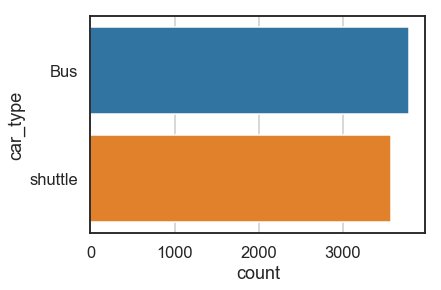

In [17]:
sns.countplot(y='car_type', data=data_exp)

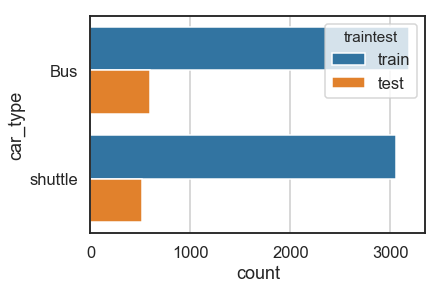

In [76]:
sns.countplot(data =data_exp, y='car_type', hue='traintest', orient='h')

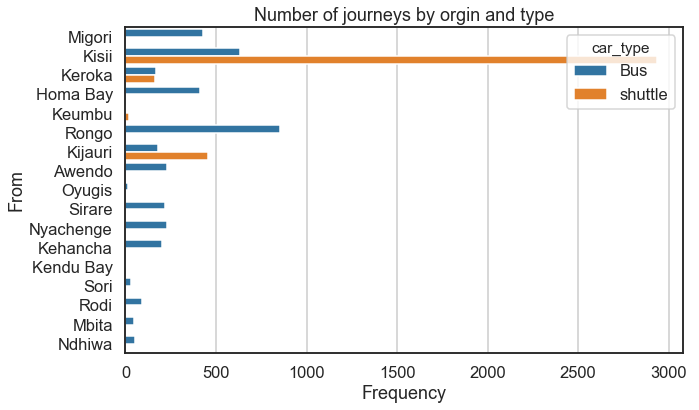

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y='travel_from',hue='car_type', data=data_exp)
plt.ylabel("From")
plt.xlabel("Frequency")
plt.title("Number of journeys by orgin and type")
plt.show()

Text(0.5,1,'Number of journeys by orgin and train / test set')

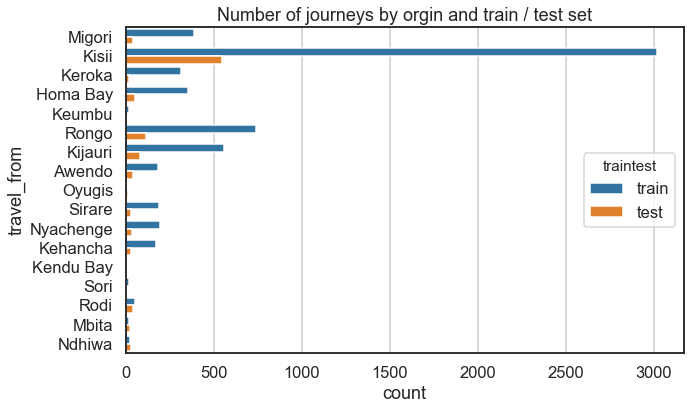

In [71]:
# Journey destination by train and test groups
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data =data_exp, y='travel_from', hue='traintest', orient='h')
plt.title("Number of journeys by orgin and train / test set")

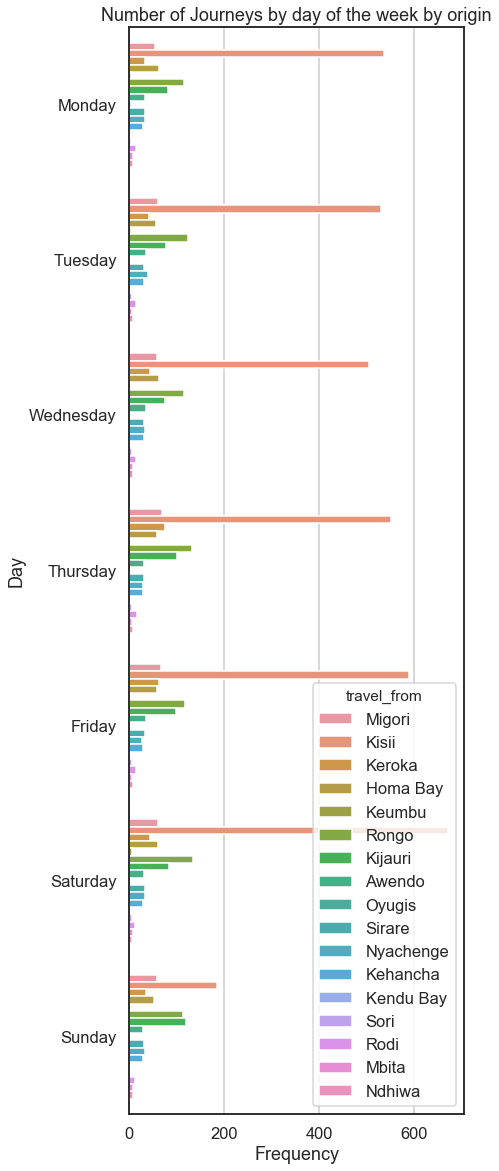

In [19]:
fig, ax = plt.subplots(figsize=(6,20))
sns.countplot(y="day", data=data_exp, hue='travel_from', orient='h')
ax.set_yticklabels( ('Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday') )
plt.ylabel("Day")
plt.xlabel("Frequency")
plt.title("Number of Journeys by day of the week by origin")
plt.show()

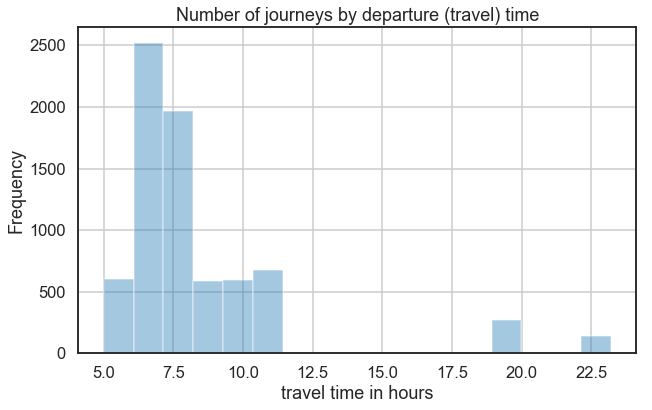

In [57]:
# Frequency of departure by minutes after midnight
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data_exp.travel_time, kde=False, bins=17)
plt.xlabel("travel time in hours")
plt.ylabel("Frequency")
plt.title("Number of journeys by departure (travel) time")
plt.show()

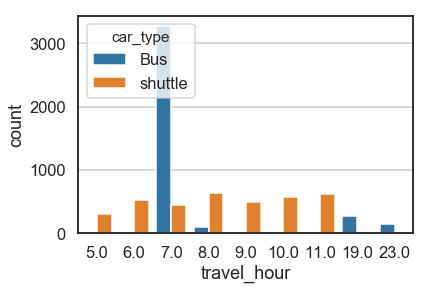

In [63]:
sns.countplot(data=data_exp, x='travel_hour', hue='car_type')

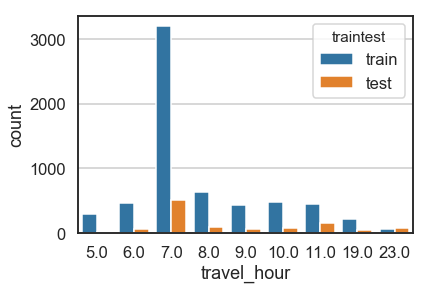

In [32]:
sns.countplot(data=data_exp, x='travel_hour', hue='traintest')

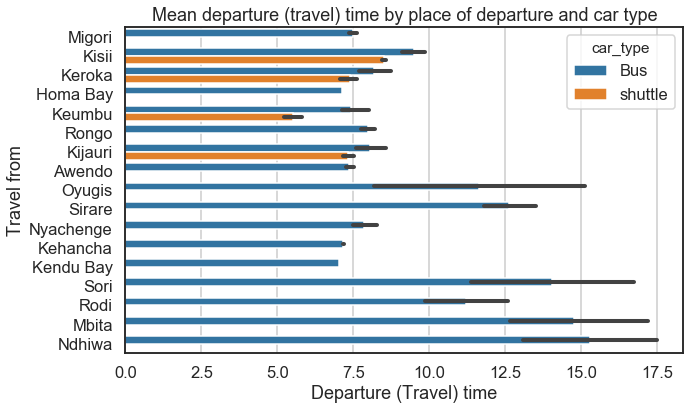

In [62]:
# Travel time by place of departure
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y='travel_from', x='travel_time', hue='car_type', data=data_exp, orient='h')
plt.ylabel("Travel from")
plt.xlabel("Departure (Travel) time")
plt.title("Mean departure (travel) time by place of departure and car type")
plt.show()

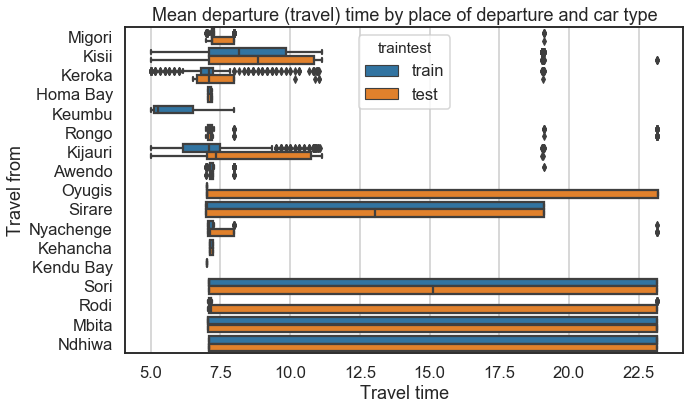

In [78]:
# Travel time by place of departure
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y='travel_from', x='travel_time', hue='traintest', data=data_exp, orient='h')
plt.ylabel("Travel from")
plt.xlabel("Travel time")
plt.title("Mean departure (travel) time by place of departure and car type")
plt.show()

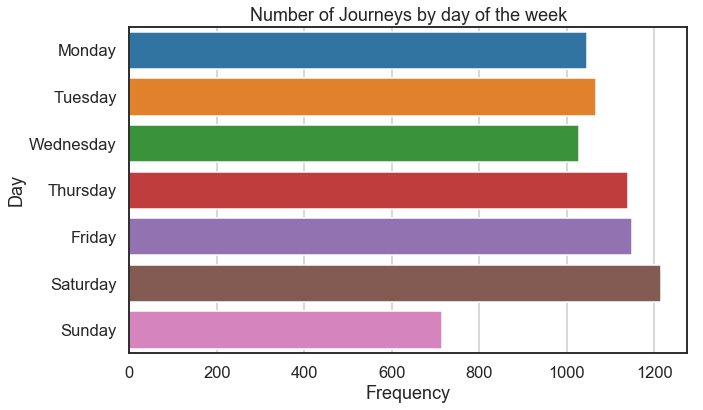

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y="day", data=data_exp, orient='h')
ax.set_yticklabels( ('Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday') )
plt.ylabel("Day")
plt.xlabel("Frequency")
plt.title("Number of Journeys by day of the week")
plt.show()

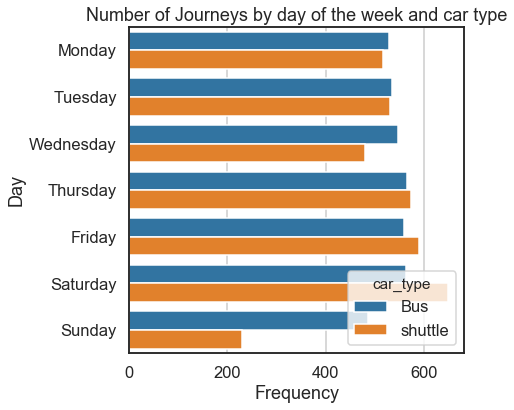

In [58]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(y="day", data=data_exp, hue='car_type', orient='h')
ax.set_yticklabels( ('Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday') )
plt.ylabel("Day")
plt.xlabel("Frequency")
plt.title("Number of Journeys by day of the week and car type")
plt.show()

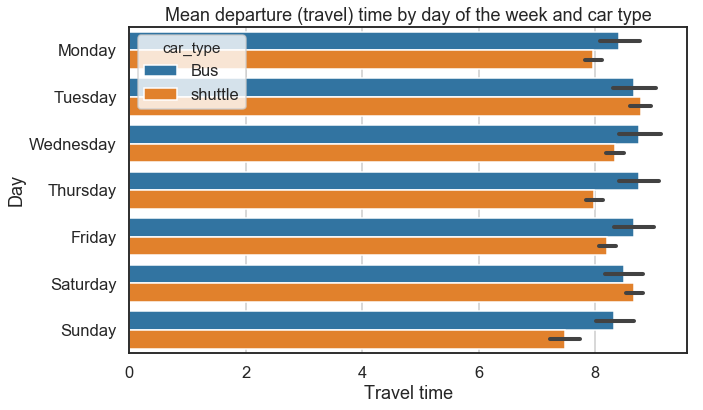

In [59]:

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y='day', x='travel_time', hue='car_type', data=data_exp, orient='h')
ax.set_yticklabels( ('Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday') )
plt.ylabel("Day")
plt.xlabel("Travel time")
plt.title("Mean departure (travel) time by day of the week and car type")
plt.show()

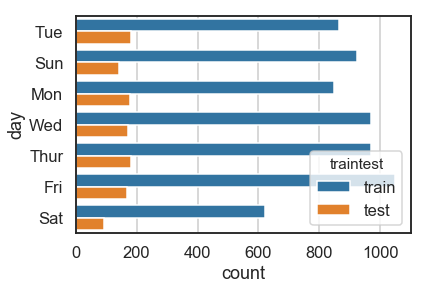

In [72]:
sns.countplot(data =data_exp, y='day', hue='traintest', orient='h')

4     1551
2     1503
12    1484
3     1353
1      952
5      363
11     153
10       1
Name: month, dtype: int64


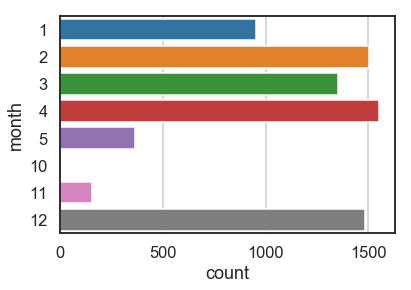

In [74]:
sns.countplot(data =data_exp, y='month', orient='h')
print(data_exp.month.value_counts())

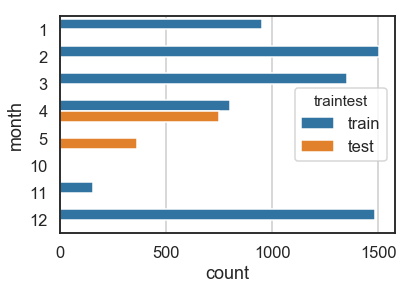

In [75]:
sns.countplot(data =data_exp, y='month', hue='traintest', orient='h')

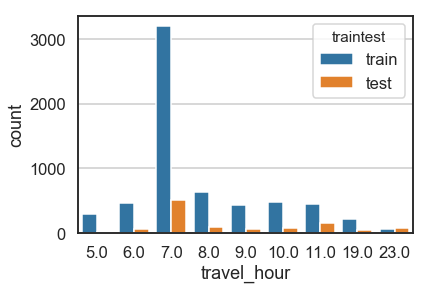

In [37]:
sns.countplot(data =data_exp, x='travel_hour', hue='traintest')

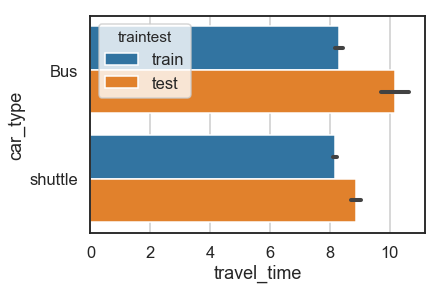

In [40]:
sns.barplot(data =data_exp, y='car_type', x='travel_time', hue='traintest', orient='h')

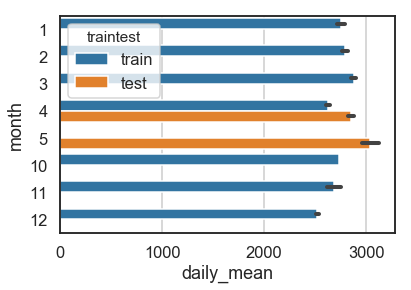

In [41]:
sns.barplot(data=data_exp, x='daily_mean', y='month',hue='traintest', orient='h')

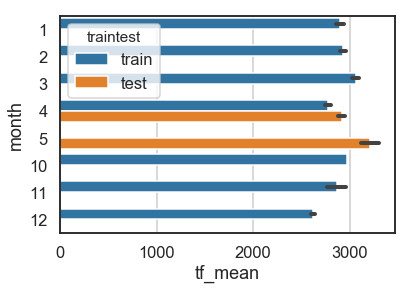

In [42]:
sns.barplot(data=data_exp, x='tf_mean', y='month',hue='traintest', orient='h')

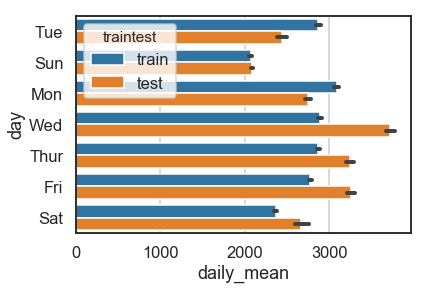

In [43]:
sns.barplot(data=data_exp, x='daily_mean', y='day',hue='traintest', orient='h')

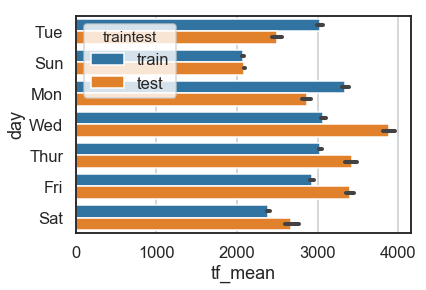

In [44]:
sns.barplot(data=data_exp, x='tf_mean', y='day',hue='traintest', orient='h')